# Study of the parameters

The objective of this study is to determine the influence of the different parameters on the power distribution. We will now focus on the dynamic model which is described relies on DMPC.py.

One of the principal issue here is to get an overview of the compfort parameter in ordr to use it to cheat in the CMPC at first.


-- Sylvain Chatel, July 2016 --

In [2]:
from __future__ import division, print_function
import DMPC_Draft as DO
from cvxopt import matrix, solvers
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from tempfile import TemporaryFile
%matplotlib inline

/Users/sylvainchatel/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Influence of the comfort parameter for two users

### Definition of the problem

In [3]:
# number of users
m = 2
# vector of users
i = np.arange(m)
# Time step
dt = 0.1  # h
# Simulation Horizon
N_sim = int(24/dt)
# Prediction Horizon
N = int(5/dt)
# time vector
t = np.arange(N + N_sim) * dt
t_sim = np.arange(N_sim) * dt
# max energy in kW
Umax = 3
# max admissible energy
u_m = np.array([2, 2], dtype=float)
# thermal parameters
        ## Exterior Temperature on the whole horizon
Text_sim = np.ones(m*(N_sim + N))*0
        ## Exterior Temperature on the prediction horizon initially
Text = Text_sim[0:m*N]
        ## Temperature when present
Tpres = 22
        ## Temperature when absent
Tabs = 18
        ## Initial temperature in all users
T_init = np.array([10, 10], dtype=float)
        ## Thermal Resistance
Rth = np.array([50, 50], dtype=float)
        ## Thermal Capacity
Cth = 2*np.array([0.056, 0.056], dtype=float)
        ## Reference temperature through the whole horizon
T_mod = np.hstack(
    (DO.temp_id(N_sim + N, dt, Tabs, Tpres), DO.temp_id(N_sim + N, dt, Tabs, Tpres)))  ## ATTENTION : defined user after user
        ## Reference temperature through the simulation horizon
T_id_pred = np.hstack(
    (DO.temp_id(N_sim, dt, Tabs, Tpres), DO.temp_id(N_sim, dt, Tabs, Tpres)))  ## ATTENTION : defined user after user
# comfort factor
alpha = np.array([10, 10], dtype=float)
alpha_2 = np.array([10, 100], dtype=float)

## Verifications
assert len(u_m) == m, "illegal number of users. Expecting %s. and received %s." % (m, len(u_m))
assert len(T_init) == m, "illegal number of T_init. Expecting %s. and received %s." % (m, len(T_init))
assert len(Rth) == m, "illegal number of Rth. Expecting %s. and received %s." % (m, len(Rth))
assert len(Cth) == m, "illegal number of Cth. Expecting %s. and received %s." % (m, len(Cth))
assert len(alpha) == m, "illegal number of alpha. Expecting %s. and received %s." % (m, len(alpha))

# Definition of the dictionary
pb_1 = dict(m=m, dt=dt, Umax=Umax, u_m=u_m, Text=Text, Text_sim=Text_sim, T_mod=T_mod, T_init=T_init, Rth=Rth, Cth=Cth,
          T_id_pred=T_id_pred, alpha=alpha, N=N, N_sim=N_sim)

pb_2 = dict(m=m, dt=dt, Umax=Umax, u_m=u_m, Text=Text, Text_sim=Text_sim, T_mod=T_mod, T_init=T_init, Rth=Rth, Cth=Cth,
          T_id_pred=T_id_pred, alpha=alpha_2, N=N, N_sim=N_sim)

In [4]:
T_1, U_1 = DO.get_Opt_CL(pb_1)
T_2, U_2= DO.get_Opt_CL(pb_2)

T_id_pred =  T_id_pred.reshape((N_sim, 2))
T_1 = T_1.reshape((N_sim, 2))
T_2 = T_2.reshape((N_sim, 2))
U_1 = U_1.reshape((N_sim, 2))
U_2 = U_2.reshape((N_sim, 2))

In [5]:
def plot_T_tot(pb, T_opt, u_sol, T_opt2, u_sol2):
    """
    DynamicOpt.plot_T(object)
    Parameters : dictionary of the variables, number of the user, the vector of all optimal temperature
    from DynamicOpt.get_temp_op_OL and the vector of optimal power.
    returns : graph of the ideal temperature and the optimum temperature.
    """
    T_id_pred = pb['T_id_pred']
    dt = pb['dt']
    m = pb['m']
    N_sim = pb['N_sim']
    t = np.arange(N_sim) * dt

    fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(9, 6))

    ax1.plot(t, [T_id_pred[j] for j in range(N_sim)], 'k:',
             label='T_id')
    ax1.plot(t, T_opt[:, 0], 'b', label=r'$T_{eq}$')
    ax1.plot(t, T_opt2[:, 0], 'g', label=r'T_1')
    ax1.plot(t, T_opt2[:, 1], 'r', label=r'T_2')
    ax1.legend()


    ax2.plot(t, u_sol[:, 0], 'b', label='$U_{eq}$')
    ax2.plot(t, u_sol2[:, 0], 'g', label='$U_1$')
    ax2.plot(t, u_sol2[:, 1], 'r', label='$U_2$')
    ax2.legend()

    ax1.set(
        ylabel=u'T (C)'
        #ylim=([17,23])
    )

    ax2.set(
        xlabel='t (h)',
        ylabel=u'Power kW'
    )


    fig.tight_layout()

    return fig, (ax1, ax2)

(6, 7)

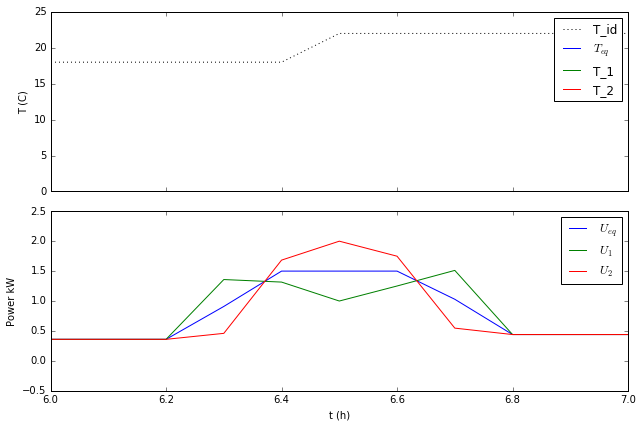

In [6]:
plot_T_tot(pb_1, T_1, U_1, T_2, U_2)
plt.xlim(6,7)

*Note : We can easily extend this result for two users to multiple users using the observations made with the static parametric study.*